# Prosper Loan Data
## by Nidhi Mishra

## Preliminary Wrangling

> I have chosen the Prosper Loan Data, as I believe there will lot of interesting factors to learn on how your loan amount to interest rates are affected.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
loanData = pd.read_csv('ProsperLoanData.csv')

In [3]:
# high-level overview of data shape and composition
print(loanData.shape)
print(loanData.dtypes)
print(loanData.head(10))

(113937, 81)
ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64


#### Variables under consideration

> Term, LoanStatus, BorrowerRate, ListingCategory (numeric), StatedMonthlyIncome, OpenRevolvingMonthlyPayments, 
> BorrowerState, EmploymentStatus, IsBorrowerHomeowner, CreditScore, DebtToIncomeRatio, IncomeRange, 
> LoanOriginalAmount, LoanOriginationQuarter, CurrentCreditLines, AvailableBankcardCredit, BankcardUtilization,
> CurrentDelinquencies, MonthlyLoanPayments, InquiriesLast6Months, LoanOriginationYear


In [4]:
loanData = loanData[loanData.EmploymentStatus != 'Not available']

In [5]:
# Taking Average of Upper and Lower Credit Score
loanData['CreditScore'] = loanData['CreditScoreRangeLower'] + loanData['CreditScoreRangeUpper']/2

In [6]:
# Split variable LoanOriginationQuarter
loanData['LoanOriginQuarter'], loanData['LoanOriginYear'] = loanData['LoanOriginationQuarter'].str.split(" ", 1).str
loanData.drop(columns =["LoanOriginationQuarter"], inplace = True)

In [7]:
# Keeping the only required variables
A = ['Term', 'LoanStatus', 'BorrowerRate', 'ListingCategory (numeric)', 'StatedMonthlyIncome', 'OpenRevolvingMonthlyPayment', 'BorrowerState', 'EmploymentStatus', 'IsBorrowerHomeowner', 'CreditScore', 'DebtToIncomeRatio', 'IncomeRange',
     'LoanOriginalAmount', 'LoanOriginQuarter', 'CurrentCreditLines', 'AvailableBankcardCredit', 'BankcardUtilization', 'CurrentDelinquencies', 'MonthlyLoanPayment', 'InquiriesLast6Months', 'LoanOriginYear']
loanData = loanData[A]

In [8]:
# convert categorical data into ordered categorical types
ordinal_var_dict = {'Term': [12, 36, 60],
                    'LoanStatus': ['Current', 'Completed', 'Chargedoff', 'Defaulted', 'Past Due (1-15 days)', 'Past Due (31-60 days)', 
                                   'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (16-30 days)', 'FinalPaymentInProgress',
                                  'Past Due (>120 days)', 'Cancelled'],
                   'IncomeRange': ['$25,000-49,999', '$50,000-74,999', '$100,000+', '$75,000-99,999', 'Not displayed','$1-24,999','Not employed','$0'],
                   'LoanOriginQuarter': ['Q1', 'Q2', 'Q3', 'Q4'],
                'ListingCategory (numeric)': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
                   'EmploymentStatus': ['Employed', 'Full-time', 'Self-employed', 'Other','Part-time', 'Not employed', 'Retired']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loanData[var] = loanData[var].astype(ordered_var)

In [9]:
loanData = loanData.dropna()

In [10]:
loanData.EmploymentStatus.value_counts()

Employed         65896
Full-time        24119
Other             3526
Self-employed      993
Part-time          884
Retired            702
Not employed        67
Name: EmploymentStatus, dtype: int64

### What is the structure of your dataset?

> - There are 113937 entries in the dataset with 81 features. 
> - The variables are numeric and categorical in nature, and there are 10 categorical variables.
> - and clarity are ordered factor variables with the following levels.

### What is/are the main feature(s) of interest in your dataset?

> The most interesting take away I want to get from this dataset are the average amount of loans taken by people, the salary of people who get maximum loan, their employment kind, places from where they belong, interest rate given on the loan, term of the loan, purpose of loan, etc.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I believe that the status of employment and salary of the applicant are the biggest contributors to the loan approval, but their are plently other factors that can affect the loan status. Lets find out!

## Univariate Exploration

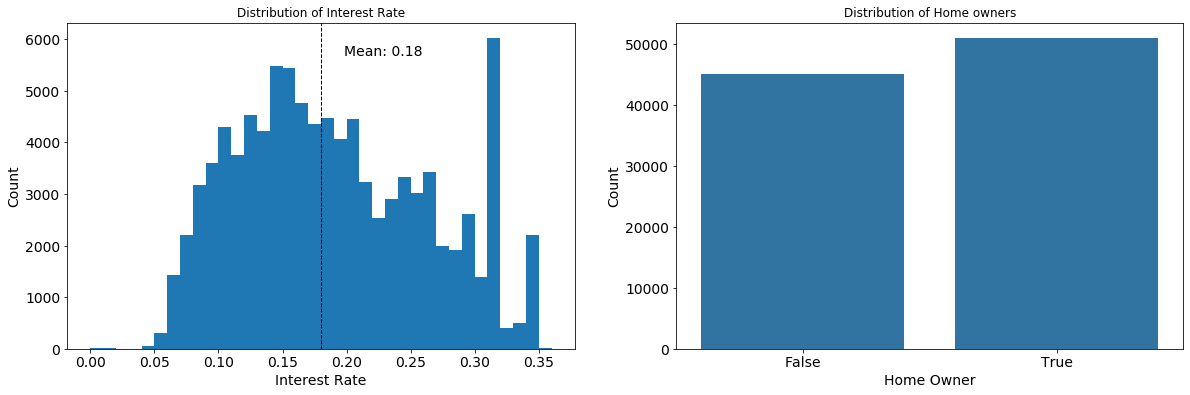

In [11]:
plt.figure(figsize = [20, 6])
plt.subplot(1,2,1)
bins = np.arange(0, loanData['BorrowerRate'].max()+ 0.01, 0.01)
plt.hist(data = loanData, x = 'BorrowerRate', bins = bins);
plt.xticks(fontsize =14);
plt.yticks(fontsize =14);
plt.axvline(bins.mean(), color='k', linestyle='dashed', linewidth=1)

#Getting mean of the data to plot vertical line
_, max_ = plt.ylim()
plt.text(bins.mean() + bins.mean()/10, 
         max_ - max_/10, 
         'Mean: {:.2f}'.format(bins.mean()), size = 14)
plt.xlabel('Interest Rate', fontsize = 14);
plt.ylabel('Count', fontsize = 14);
plt.title('Distribution of Interest Rate');

plt.subplot(1,2,2)
sb.countplot(data = loanData, x = 'IsBorrowerHomeowner', color = sb.color_palette()[0]);
plt.xlabel('Home Owner', fontsize = 14);
plt.ylabel('Count', fontsize = 14);
plt.xticks(fontsize =14);
plt.yticks(fontsize =14);
plt.title("Distribution of Home owners");

> Observation 1:
The mean interest is 18% which seems quite high but if we account for outliers this seems logical, we can also investigate further looking into loan terms, whether they are short or long. 
> From the second plot , we can conclude that owning a home is distributed evenly among the loan applicators.

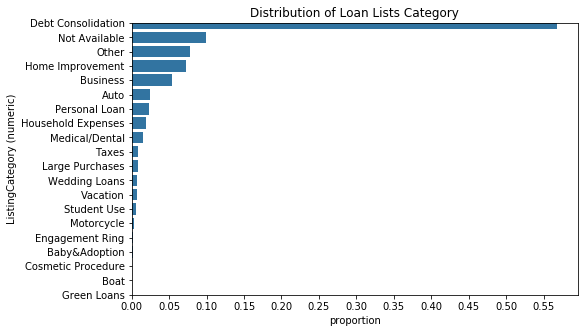

In [12]:
# get proportion taken by most common group for derivation of tick marks
list_order =loanData['ListingCategory (numeric)'].value_counts().index
n_points = loanData.shape[0]
max_count = loanData['ListingCategory (numeric)'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
plt.figure(figsize=[8, 5]);

# create the plot
sb.countplot(data = loanData, y = 'ListingCategory (numeric)', color = sb.color_palette()[0], order = list_order);
labels = ['Debt Consolidation', 'Not Available', 'Other', 'Home Improvement',  'Business', 'Auto', 'Personal Loan', 'Household Expenses', 'Medical/Dental', 'Taxes', 'Large Purchases','Wedding Loans',
          'Vacation', 'Student Use', 'Motorcycle', 'Engagement Ring', 'Baby&Adoption', 'Cosmetic Procedure', 'Boat', 'Green Loans', 'RV']
plt.yticks(np.arange(20),labels);
plt.xticks(tick_props * n_points, tick_names);
plt.xlabel('Proportion');
plt.title('Distribution of Loan Lists Category');

> Over 50% of loan is taken for Debt consolidation! Quite unexpected.

In [13]:
#Removing the outliers:
loanData1 = loanData[loanData['StatedMonthlyIncome'] <= 20000]

In [14]:
loanData1['StatedMonthlyIncome'].max()

20000.0

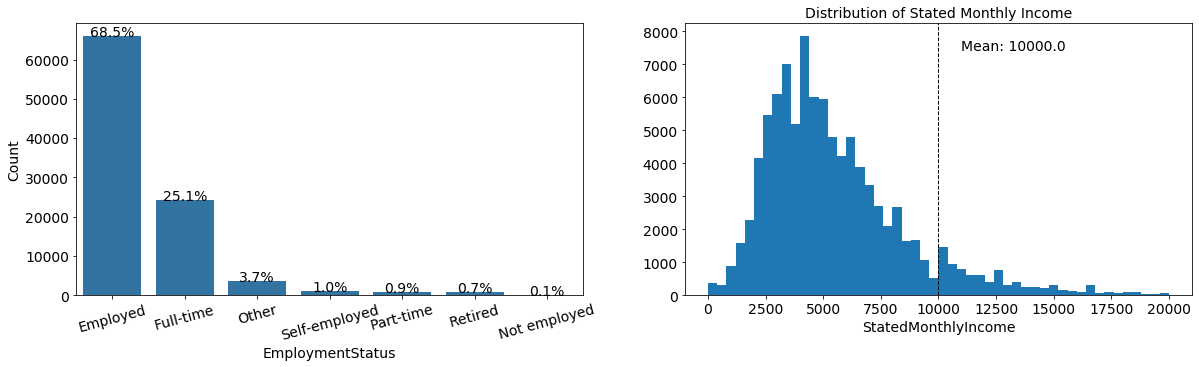

In [15]:
plt.figure(figsize = [20, 5])
plt.subplot(1,2,1)
n_points = loanData.shape[0]
employ_order = loanData['EmploymentStatus'].value_counts().index
sb.countplot(data = loanData, x = 'EmploymentStatus', color = sb.color_palette()[0], order = employ_order);
Employ_counts = loanData['EmploymentStatus'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = Employ_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-5, pct_string, ha = 'center', color = 'black', size = 14);

plt.xticks(rotation =15, fontsize = 14);
plt.yticks(fontsize = 14);
plt.xlabel('EmploymentStatus', fontsize = 14);
plt.ylabel('Count', fontsize = 14);

plt.subplot(1,2,2)
binsize = 400
bins = np.arange(0, loanData1['StatedMonthlyIncome'].max()+ binsize, binsize)
plt.hist(data = loanData1, x = 'StatedMonthlyIncome', bins = bins)
plt.title('Distribution of Stated Monthly Income', fontsize = 14);
plt.axvline(bins.mean(), color='k', linestyle='dashed', linewidth=1)

#Getting mean of the data to plot vertical line
_, max_ = plt.ylim()
plt.text(bins.mean() + bins.mean()/10, 
         max_ - max_/10, 
         'Mean: {}'.format(bins.mean()), size = 14);
plt.xlabel('StatedMonthlyIncome', fontsize = 14);
plt.xticks(fontsize =14);
plt.yticks(fontsize =14);

> Almost 60% of the loan takers are employed and next is "Full-Time" which is also employed. Hence we see that more than 80% are employed applicants, which shows it is a major factor for loan approval.
> Second plot shows a mean salary of 10K an median of ~50K. We can investigate further with other variables.

In [16]:
loanData['LoanOriginalAmount'].describe()

count    96187.000000
mean      8733.584934
std       6367.676987
min       1000.000000
25%       4000.000000
50%       7000.000000
75%      13000.000000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

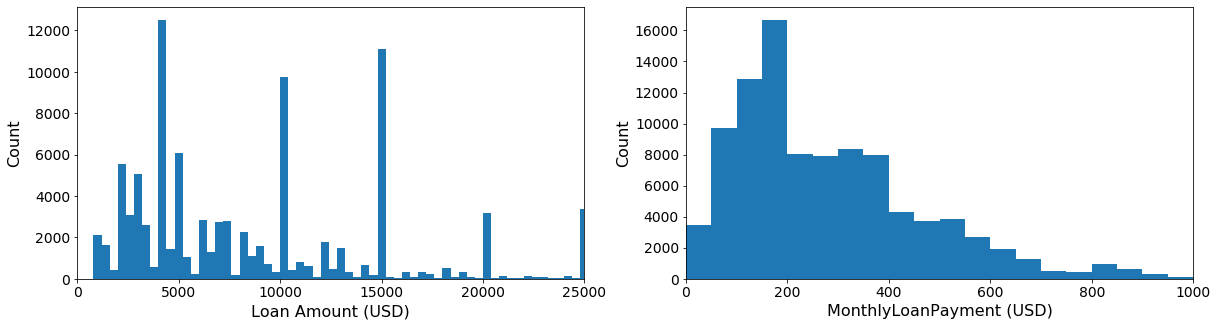

In [17]:
plt.figure(figsize = [20, 5])
plt.subplot(1,2,1);
plt.hist(data = loanData, x ='LoanOriginalAmount', bins= np.arange(0, loanData['LoanOriginalAmount'].max()+400,400));
# plt.xscale('log');
plt.xlim(0, 25000);
plt.xlabel('Loan Amount (USD)', fontsize = 16);
plt.ylabel('Count', fontsize = 16);
plt.xticks(fontsize = 14);
plt.yticks(fontsize = 14);

plt.subplot(1,2,2);
loanData['MonthlyLoanPayment']
bins = np.arange(0, loanData['MonthlyLoanPayment'].max() + 50, 50)
plt.hist(data = loanData, x = 'MonthlyLoanPayment', bins = bins);
plt.xlim(0, 1000)
plt.xlabel('MonthlyLoanPayment (USD)', size = 16);
plt.ylabel('Count', fontsize = 16);
plt.xticks(fontsize = 14);
plt.yticks(fontsize = 14);

> The mean loan amount is 8337 USD. We can see that max loans were taken in whole numbers of 5K, 10K, 15K, 20K and 25K.
> Maximum monthly loan payment amount is <400 USD . This shows most people opt for smaller installment amounts, we can investigate further with loan term and interest rates, credit scores, etc.

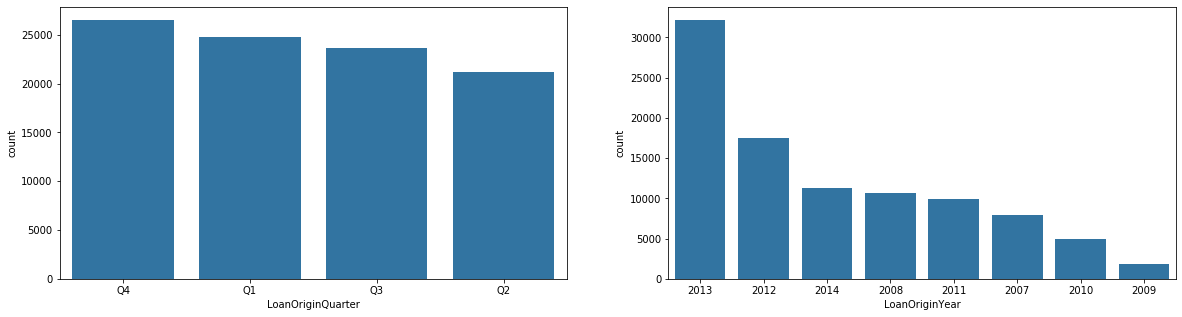

In [18]:
plt.figure(figsize = [20, 5])
plt.subplot(1,2,1)
quarter_order = loanData['LoanOriginQuarter'].value_counts().index
sb.countplot(data = loanData, x = 'LoanOriginQuarter', color = sb.color_palette()[0], order = quarter_order);

plt.subplot(1,2,2)
year_order = loanData['LoanOriginYear'].value_counts().index
sb.countplot(data = loanData, x = 'LoanOriginYear', color = sb.color_palette()[0], order = year_order);

> Q4 and Q3 most common for loan applciation
> The figure shows that between year 2005 to 2014, the maximum loan were taken in year 2013

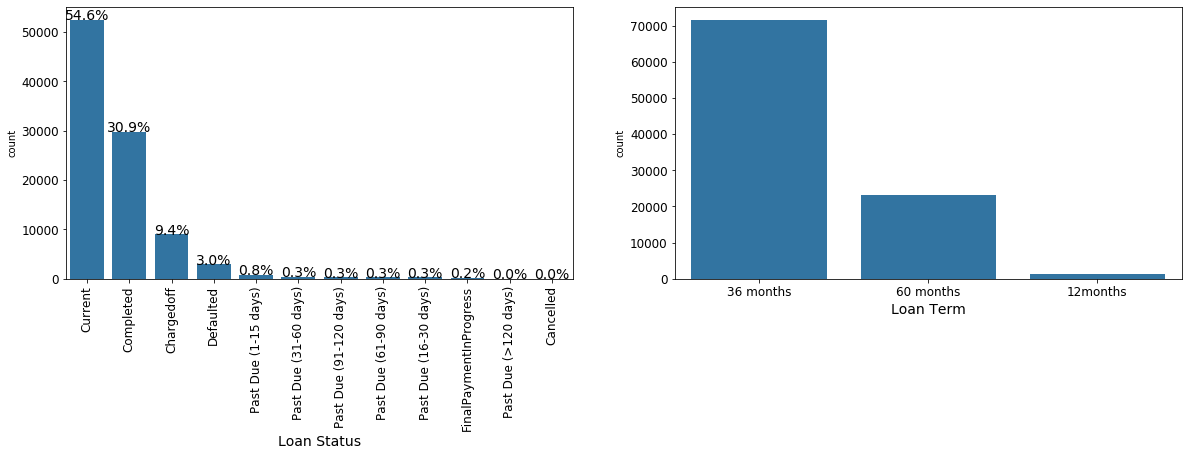

In [19]:
plt.figure(figsize=[20, 5])
plt.subplot(1,2,1)
status_order = loanData['LoanStatus'].value_counts().index
sb.countplot(data = loanData, x = 'LoanStatus', color = sb.color_palette()[0], order = status_order);

Loan_counts = loanData['LoanStatus'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels
# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = Loan_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-10, pct_string, ha = 'center', color = 'black', size = 14);
plt.xlabel('Loan Status',fontsize = 14);
# plt.ylabel(fontsize = 16);
plt.xticks(rotation = 90, fontsize = 12);
plt.yticks(fontsize = 12);

plt.subplot(1,2,2)
term_order = loanData['Term'].value_counts().index
ax = sb.countplot(data = loanData, x = 'Term', color = sb.color_palette()[0], order = term_order);
labels = ['36 months', '60 months', '12months'];
ax.set_xticklabels(labels);
plt.xlabel('Loan Term',fontsize = 14);
# plt.ylabel(fontsize = 14);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);

> Maximum loan is current and completed with less than 20% being as defaulters
> Most people opt for a 3 year loan term which is at around 80%.

e:\python\python37-32\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


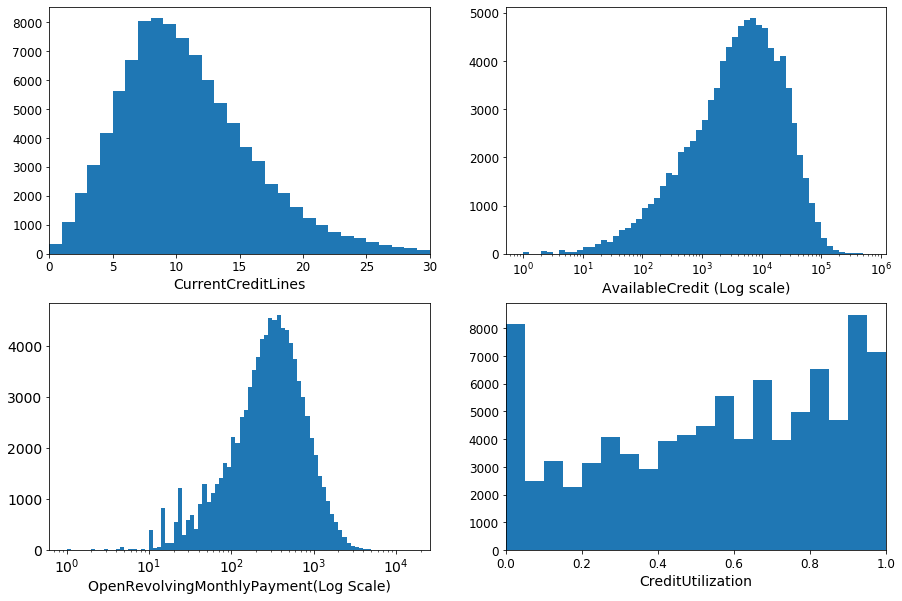

In [20]:
plt.figure(figsize=[15, 10])

plt.subplot(2,2,1);
bins = np.arange(0, loanData['CurrentCreditLines'].max() +1, 1)
plt.hist(data = loanData, x = 'CurrentCreditLines', bins = bins);
plt.xlim(0, 30);
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('CurrentCreditLines', fontsize = 14);

plt.subplot(2,2,2);
bins = 10** np.arange(0, np.log10(loanData['AvailableBankcardCredit']).max() + 0.1, 0.1)
plt.hist(data = loanData, x = 'AvailableBankcardCredit', bins = bins);
plt.xscale('log');
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
# plt.xlim(0, 30);
plt.xlabel('AvailableCredit (Log scale)', fontsize = 14);


plt.subplot(2,2,3);
binsize = 0.05
bins = 10**np.arange(0, np.log10(loanData['OpenRevolvingMonthlyPayment'].max()) + binsize, binsize)
plt.hist(data = loanData, x ='OpenRevolvingMonthlyPayment', bins = bins)
plt.xscale('log')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('OpenRevolvingMonthlyPayment(Log Scale)', fontsize = 14);

plt.subplot(2,2,4);
bins = np.arange(0, loanData['BankcardUtilization'].max() + 0.05, 0.05)
plt.hist(data = loanData, x = 'BankcardUtilization', bins = bins);
# plt.xscale('log')
plt.xlim(0, 1);
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('CreditUtilization', fontsize = 14);

> Various plots related to credit against number of loans.


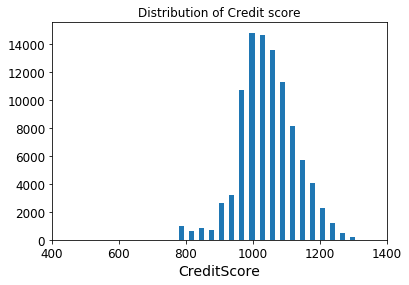

In [21]:
bins = np.arange(0, loanData['CreditScore'].max() +15, 15)
plt.hist(data = loanData, x = 'CreditScore', bins = bins);
plt.xlim(400, 1400);
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('CreditScore', fontsize = 14);
plt.title('Distribution of Credit score');

> The Credit score has a normal distribution, concentrated at 1000, which is the average credit score for applicants.

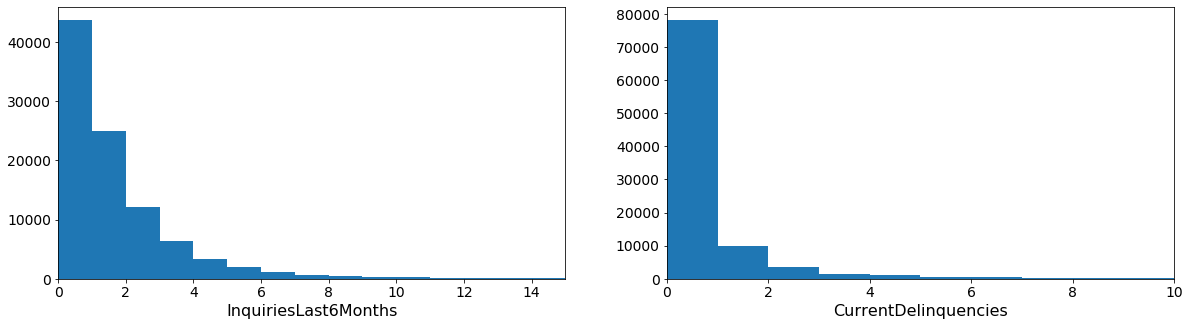

In [22]:
plt.figure(figsize=[20, 5])
plt.subplot(1,2,1)
bins = np.arange(0, loanData['InquiriesLast6Months'].max() + 1, 1)
plt.hist(data = loanData, x = 'InquiriesLast6Months', bins = bins);
# plt.xscale('log')
plt.xlim(0, 15);
plt.xlabel('InquiriesLast6Months', fontsize =16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);


plt.subplot(1,2,2)
bins = np.arange(0, loanData['CurrentDelinquencies'].max() + 1, 1)
plt.hist(data = loanData, x = 'CurrentDelinquencies', bins = bins);
# plt.xscale('log')
plt.xlim(0, 10);
plt.xlabel('CurrentDelinquencies', fontsize = 16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

> About 80% of applicants have no delinquencies on their current accounts, and about 75% of them have had their credit pulled two or fewer times in the last 6 months.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> OpenRevolvingMonthlyPayment and AvailableCredit had large range values and uneven distribution, So I performed log transformation on both of them.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes for StatedMonthlyIncome, there were many outliers so I had ti filter them out to get a better picture of the distribution. For LoanOriginalAmount and MonthlyLoanPayment as well , I added a limit on the xscale to remove the outliers. !

## Bivariate Exploration

In [23]:
loanData['LoanStatus'].value_counts()

Current                   52478
Completed                 29750
Chargedoff                 9022
Defaulted                  2890
Past Due (1-15 days)        722
Past Due (31-60 days)       327
Past Due (91-120 days)      277
Past Due (61-90 days)       275
Past Due (16-30 days)       242
FinalPaymentInProgress      189
Past Due (>120 days)         14
Cancelled                     1
Name: LoanStatus, dtype: int64

In [24]:
#For LoanStatus lets use a binomial model, so we can label the loans that are either “Completed” or “Current” with a ‘1’ and rest as ‘0’. 
#For easier plotting, Lets create a function to do this.
def label_loan (row):
   if row['LoanStatus'] == "Cancelled" :
      return 0
   if row['LoanStatus'] == "Chargedoff" :
      return 0
   if row['LoanStatus'] == "Chargedoff" :
      return 0
   if row['LoanStatus'] == "Past Due (1-15 days)" :
      return 0
   if row['LoanStatus'] == "Past Due (61-90 days)":
      return 0
   if row['LoanStatus'] == "Past Due (31-60 days)":
      return 0
   if row['LoanStatus'] == "Past Due (91-120 days)":
      return 0
   if row['LoanStatus'] == "Past Due (16-30 days)":
      return 0
   if row['LoanStatus'] == "Past Due (> 120 days)":
      return 0
   if row['LoanStatus'] == "FinalPaymentInProgress":
      return 0
   else:
        return 1

In [25]:
#Applying the function to the dataframe
loanData['LoanValue'] = loanData.apply(lambda row: label_loan(row), axis=1)
loanData['LoanValue'].value_counts()

1    85132
0    11055
Name: LoanValue, dtype: int64

##### BorrowerRate v/s LoanValue

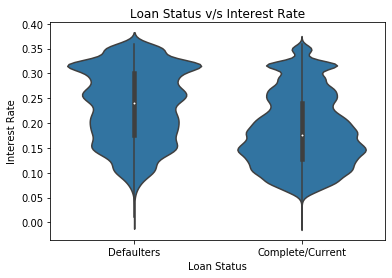

In [26]:
# Plotting
base_color = sb.color_palette()[0]
sb.violinplot(data = loanData, x = 'LoanValue', y = 'BorrowerRate', color = base_color,);
labels = ['Defaulters', 'Complete/Current']
plt.xticks(np.arange(2),labels);
plt.xlabel("Loan Status");
plt.ylabel("Interest Rate");
plt.title("Loan Status v/s Interest Rate");

> From the above violon plot , it can be clearly seen that interest rate for defaulters is higher than the complete/ Current statuses. 
it is also seen here than most defaulters interest rate is at higher end and opposite for the one with Complete status.

#### Loan Amount V/s Interest Rates

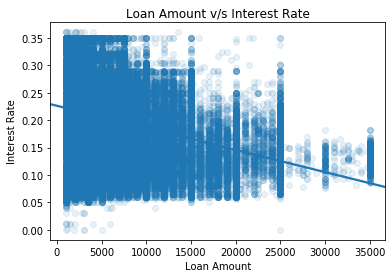

In [28]:
sb.regplot(loanData['LoanOriginalAmount'], loanData['BorrowerRate'], scatter_kws = {'alpha' : 1/10});
plt.xlabel("Loan Amount");
plt.ylabel("Interest Rate");
# plt.xlim(0, 25000);
plt.title("Loan Amount v/s Interest Rate");

> The plot beween Loan amount and Interest is quite a like what we might expect. Here we see an approx. inverse relation. That is, the higher loan amounts have lower interest rates and lower loan amounts tend to higher interest rates.

#### Employment status and term

In [29]:
# Summarizing the counts into a matrix that will be used to plot.
et_counts = loanData.groupby(['EmploymentStatus', 'Term']).size()
et_counts = et_counts.reset_index(name ='counts')
et_counts = et_counts[(et_counts.EmploymentStatus == 'Employed') | (et_counts.EmploymentStatus == 'Full-time')| (et_counts.EmploymentStatus == 'Other')| (et_counts.EmploymentStatus == 'Part-time')| 
                      (et_counts.EmploymentStatus == 'Not employed')| (et_counts.EmploymentStatus == 'Retired')]
et_counts = et_counts.pivot(index = 'Term', columns ='EmploymentStatus', values ='counts')

In [30]:
et_counts

EmploymentStatus,Employed,Full-time,Other,Part-time,Not employed,Retired
Term,,,,,,
12,1246.0,124.0,43.0,1.0,NaN,1.0
36,42886.0,23446.0,2695.0,871.0,67.0,682.0
60,21764.0,549.0,788.0,12.0,NaN,19.0


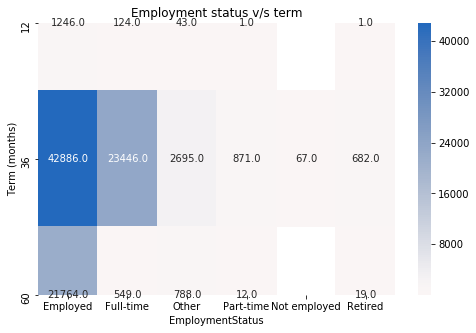

In [65]:
#Plotting
plt.figure(figsize = [8, 5])
sb.heatmap(et_counts, annot=True, fmt ='.1f', cmap = 'vlag_r', center = 0);
plt.title("Employment status v/s term");
plt.ylabel("Term (months)");

> This heatmap plot between Employment status and Term of loan shows that maximum loan was taken by employed people and for term of 3 years, the next which is almost 50% was taken by Full-time employed, which is basically same as Employed, we can conclude that employed people tend to max loans for an average period of 3 years.

#### Loan Term v/s Interest Rate

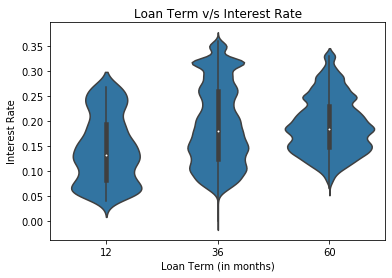

In [32]:
base_color = sb.color_palette()[0]
sb.violinplot(data = loanData, x = 'Term', y = 'BorrowerRate', color = base_color,);
plt.xlabel("Loan Term (in months)");
plt.ylabel("Interest Rate");
plt.title("Loan Term v/s Interest Rate");

> It is quite clear from the above plot that lower the term of the loan , lower will be the interest rate on that loan. However it seem sthat 36 months has the largest range of Interst rate extenidng from 0 to more than 35%.

#### Monthly Income v/s Credit Score

In [33]:
loan1 = loanData[(loanData['StatedMonthlyIncome'] <= 20000) & (loanData['CreditScore'] <= 1200)]

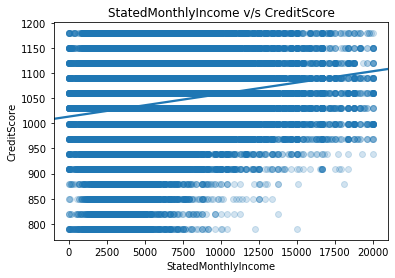

In [34]:
sb.regplot(loan1['StatedMonthlyIncome'], loan1['CreditScore'], scatter_kws = {'alpha' : 1/5});
# plt.xlim(0, 250000)
# plt.ylim(0, 2000)
plt.xlabel("StatedMonthlyIncome");
plt.ylabel("CreditScore");
plt.title("StatedMonthlyIncome v/s CreditScore");

> People with salary >= 10K get credit score more than 900, ie higher the monthly income , higher the credit score.  

#### Income Range v/s Loan Status

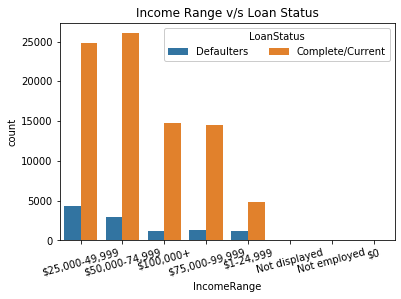

In [35]:
income_order = loanData['IncomeRange'].value_counts().index
ax = sb.countplot(data = loanData, x = 'IncomeRange', hue = 'LoanValue', order = income_order);
ax.legend(labels = ['Defaulters', 'Complete/Current'], loc = 1, ncol = 2, framealpha = 1, title = 'LoanStatus');
plt.xticks(rotation = 15);
plt.title("Income Range v/s Loan Status");


> Loan status seems to be a major role player in loan as expected. We can see that Non-Defaulters with an average income range in 25K - 75K have received the maximum loans.

#### Matrix Plot between various Quantative Variables

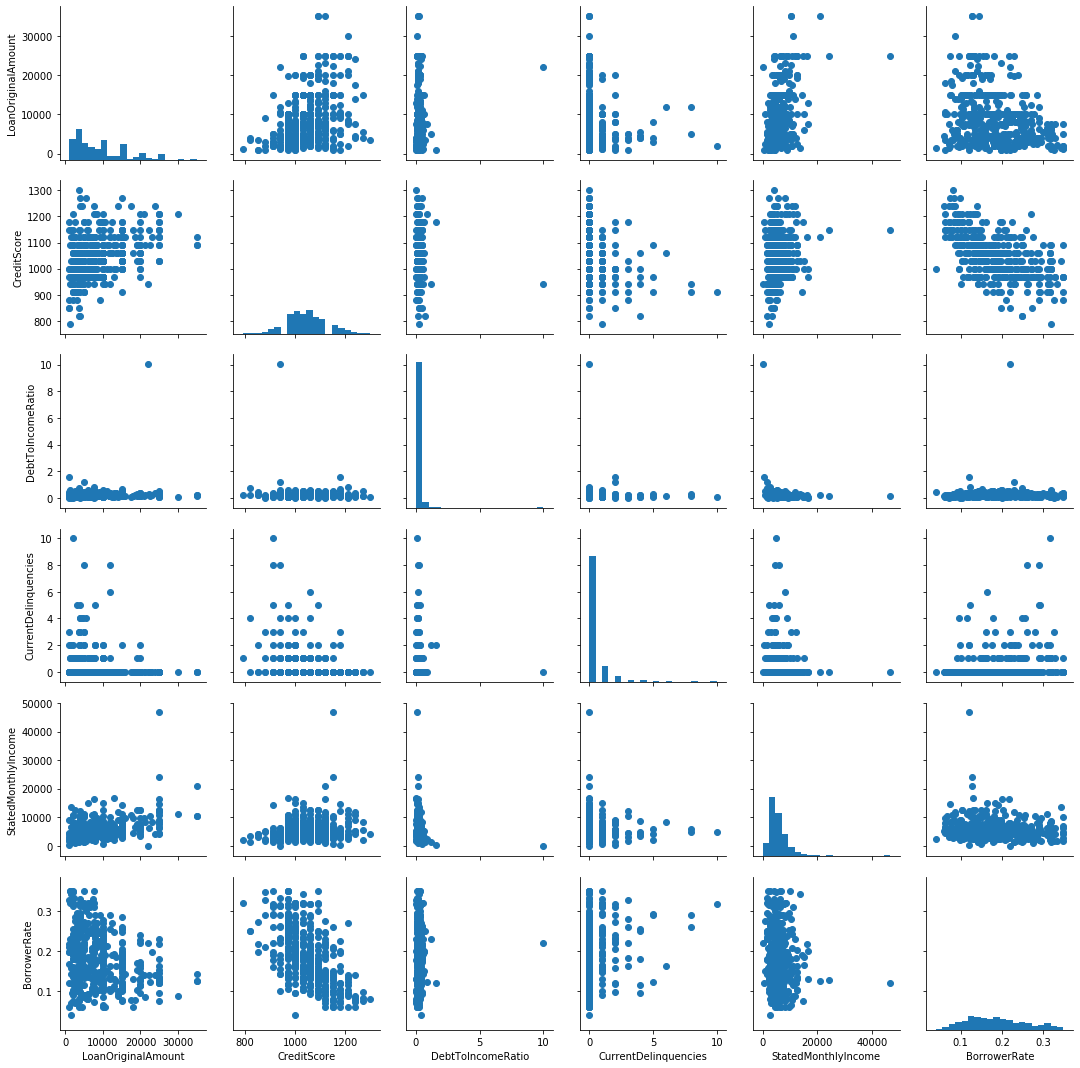

In [75]:
# plot matrix: sample 500 loan data so that plots are clearer and
# they render faster
numeric_vars = ['LoanOriginalAmount', 'CreditScore', 'DebtToIncomeRatio', 
                'CurrentDelinquencies', 'StatedMonthlyIncome', 'BorrowerRate']

samples = np.random.choice(loanData.shape[0], 500, replace = False)
loanData_samp = loanData.loc[samples,:]

g = sb.PairGrid(data = loanData_samp, vars = numeric_vars);
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

> There are lot of interesting features that we can see from this plot, 
- Interest rate and credit score tend to inversely related whereas creditscore and montly loan payment have a normal disbution showing most people get a average credit score of 1000.
- Most of current Delinquencies are between 0 - 3 across all features indicating a higher ratio is not accepted.
- It is interesting to see in Monthly income v/s interest rate plot that most loan takers have average and below salary with evenly distributed interest rates.

#### Employment Status v/s Loan Amount

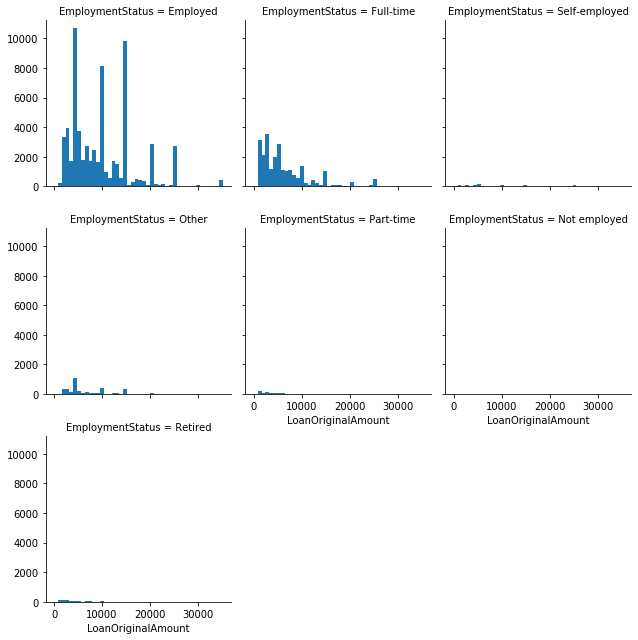

In [37]:
bins= np.arange(0, loanData['LoanOriginalAmount'].max()+800,800)
g = sb.FacetGrid(data = loanData, col = 'EmploymentStatus', col_wrap =3);
g.map(plt.hist, 'LoanOriginalAmount', bins = bins);

> As seen earlier Employment status is primary in loan approvals.

Current Delinquencies v/s Credit Score

In [38]:
# Remoivng outliers from both variables
loan1 = loanData[(loanData['CreditScore'] <= 1200) & (loanData['CurrentDelinquencies'] <= 30) ]

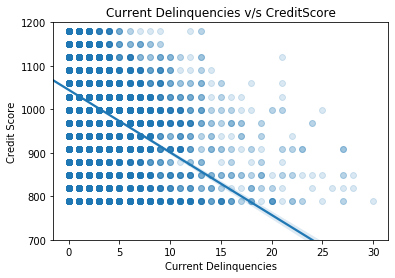

In [39]:
sb.regplot(loan1['CurrentDelinquencies'], loan1['CreditScore'], scatter_kws = {'alpha' : 1/6});
plt.xlabel("Current Delinquencies");
plt.ylabel("Credit Score");
plt.title("Current Delinquencies v/s CreditScore");
plt.ylim(700, 1200);

> Here it is evident that the lesser the Current delinquencies , higher is the credit score.

Loan Value v/s Credit Score

In [40]:
loan1 = loanData[(loanData['CreditScore'] <= 1200)]

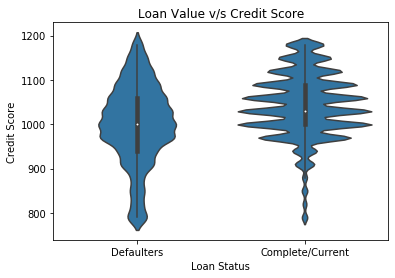

In [41]:
# plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[0]
sb.violinplot(data = loan1, x = 'LoanValue', y = 'CreditScore', color = base_color);
labels = ['Defaulters', 'Complete/Current']
plt.xticks(np.arange(2),labels);
plt.xlabel("Loan Status");
plt.ylabel("Credit Score");
plt.title("Loan Value v/s Credit Score");

IsBorrowerHomeowner v/s Interest Rate 

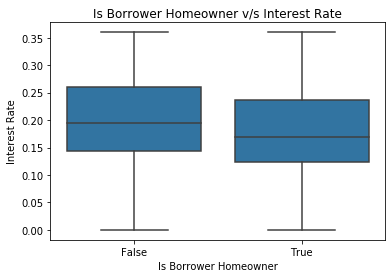

In [42]:
base_color = sb.color_palette()[0]
sb.boxplot(data = loanData, x = 'IsBorrowerHomeowner', y = 'BorrowerRate', color = base_color,);
plt.xlabel("Is Borrower Homeowner");
plt.ylabel("Interest Rate");
plt.title("Is Borrower Homeowner v/s Interest Rate");

>Although the count of loan approvals are independent of home owning,It is quite clear that home owner pays lower interest rates.

ListingCategory v/s Loan Status

In [43]:
list_order = loanData['ListingCategory (numeric)'].value_counts().index

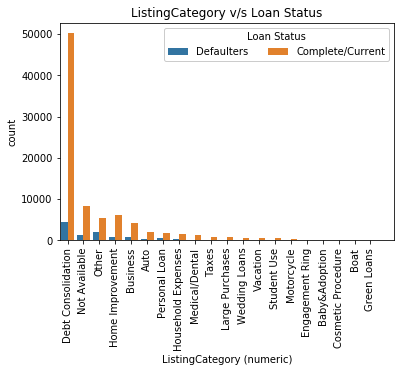

In [44]:
ax = sb.countplot(data = loanData, x = 'ListingCategory (numeric)', hue = 'LoanValue', order = list_order);
ax.legend(labels = ['Defaulters', 'Complete/Current'], loc = 1, ncol = 2, framealpha = 1, title = 'Loan Status');
labels = ['Debt Consolidation', 'Not Available', 'Other', 'Home Improvement',  'Business', 'Auto', 'Personal Loan', 'Household Expenses', 'Medical/Dental', 'Taxes', 'Large Purchases','Wedding Loans',
          'Vacation', 'Student Use', 'Motorcycle', 'Engagement Ring', 'Baby&Adoption', 'Cosmetic Procedure', 'Boat', 'Green Loans', 'RV']
plt.xticks(np.arange(20),labels, rotation = 90);
plt.title("ListingCategory v/s Loan Status");

CurrentDelinquencies v/s OpenRevolvingMonthlyPayment

In [45]:
# Removing outliers from both variables
loan1 = loanData[(loanData['OpenRevolvingMonthlyPayment'] <= 3000) & (loanData['CurrentDelinquencies'] <= 30)]

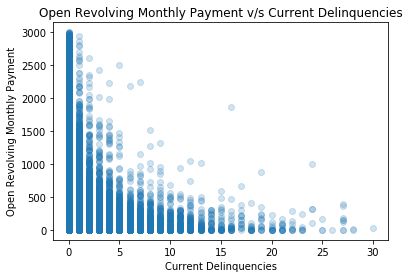

In [46]:
plt.scatter(data = loan1, x = 'CurrentDelinquencies', y = 'OpenRevolvingMonthlyPayment', alpha = 1/5);
# sb.regplot(loan1['OpenRevolvingMonthlyPayment'], loan1['CurrentDelinquencies'], scatter_kws = {'alpha' : 1/5});
plt.xlabel('Current Delinquencies');
plt.ylabel('Open Revolving Monthly Payment');
plt.title("Open Revolving Monthly Payment v/s Current Delinquencies");

Current Credit Lines v/s CreditScore

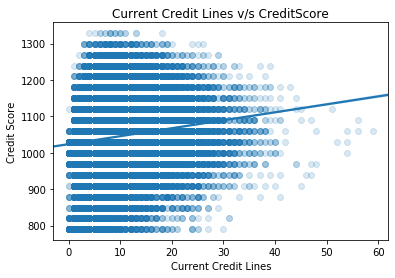

In [47]:
sb.regplot(loanData['CurrentCreditLines'], loanData['CreditScore'], scatter_kws = {'alpha' : 1/6});
plt.xlabel("Current Credit Lines");
plt.ylabel("Credit Score");
plt.title("Current Credit Lines v/s CreditScore");

>

CurrentDelinquencies v/s Interest Rate

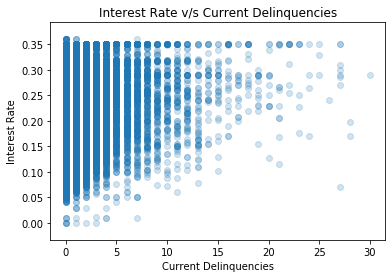

In [48]:
plt.scatter(data = loan1, x = 'CurrentDelinquencies', y = 'BorrowerRate', alpha = 1/5);
# sb.regplot(loan1['BorrowerRate'], loan1['CurrentDelinquencies'], scatter_kws = {'alpha' : 1/5});
plt.xlabel('Current Delinquencies');
plt.ylabel('Interest Rate');
plt.title("Interest Rate v/s Current Delinquencies");

>

AvailableBankcardCredit v/s BankcardUtilization

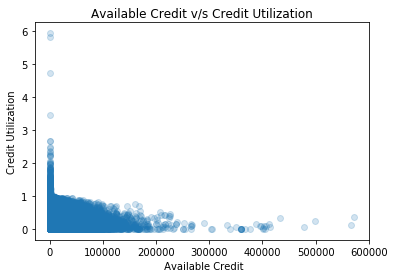

In [49]:
plt.scatter(data = loan1, x = 'AvailableBankcardCredit', y = 'BankcardUtilization', alpha = 1/5);
plt.xlabel(' Available Credit');
plt.ylabel('Credit Utilization');
plt.title("Available Credit v/s Credit Utilization");

CreditScore v/s Credit Utilization

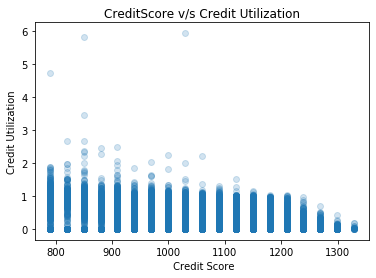

In [50]:
plt.scatter(data = loan1, x = 'CreditScore', y = 'BankcardUtilization', alpha = 1/5);
plt.xlabel(' Credit Score');
plt.ylabel('Credit Utilization');
plt.title("CreditScore v/s Credit Utilization");

>

#### Let's create a correlation heatmap of all the numerical values to a good idea of the relation between them.

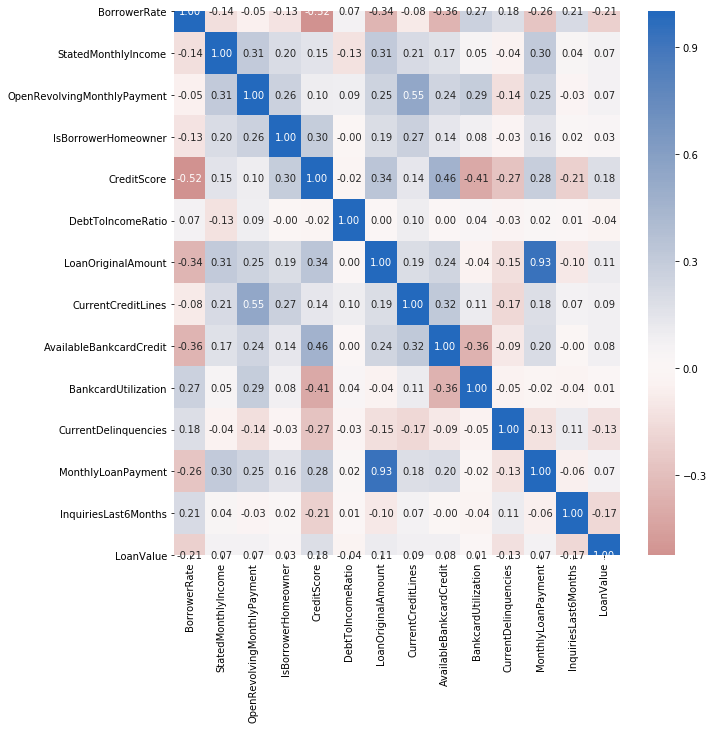

In [51]:
plt.figure(figsize =[10,10])
sb.heatmap(loanData.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

> From the heatmap we can see that there is strong relationship between Loan amount and monthly payment which was seen during biviarate as well, 
next credit lines and open revolving accounts also have a proportional relation. There are variables with negative correlation like credit score and credit utilization, and Credit score and interest rate.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There are a lot of new relationships that came into light during bivariate investigation, like how your Loan status or having a home, your income or your employment status can affect various factors of loan including the loan amount, interest rate, your credit score, loan term, etc.
Other features like how many delinquences are open or your credit utilization or open revolving accounts are also major affect on the main features.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Side features also have interesting relation for example cuurent delinquencies is directly proportional to interest rates which seems logical, open revolving accounts and current delinquencies share a inverse relation. Also, Credit utilization and  credit score have a inverse relation which was not expected.

## Multivariate Exploration

#### Loan Amount v/s Interest Rate v/s Loan Status

e:\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until


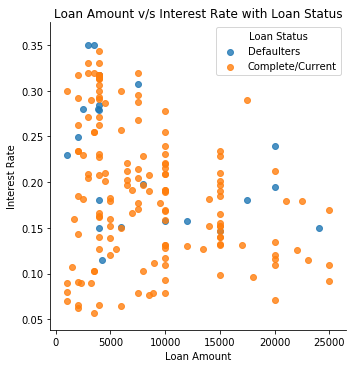

In [52]:
np.random.seed(2018)
sample = np.random.choice(loanData.shape[0], 200, replace = False)
loanData_sample= loanData.loc[sample]

g = sb.FacetGrid(data = loanData_sample, hue = 'LoanValue', height = 5)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerRate', x_jitter = 0.04, fit_reg = False);
plt.legend(['Defaulters','Complete/Current'], loc = 1, title ='Loan Status');
plt.xlabel('Loan Amount');
plt.ylabel('Interest Rate');
plt.title('Loan Amount v/s Interest Rate with Loan Status');

> We see from the plot that Defaulters tend to have a higher interest rate even on lower loan amounts.  

#### Loan Amount v/s Interest Rate V/s Loan Term

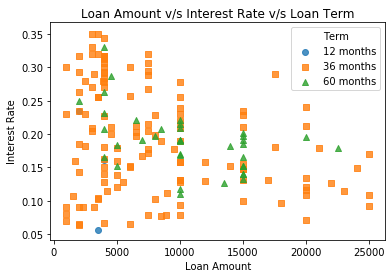

In [53]:
loan_markers = [[12, 'o'],
               [36, 's'],
               [60, '^']]

for loan, marker in loan_markers:
    df_loan = loanData_sample[loanData_sample['Term'] == loan]
    sb.regplot(data = df_loan, x = 'LoanOriginalAmount', y = 'BorrowerRate', x_jitter = 0.04, fit_reg =  False, marker = marker);
plt.legend(['12 months','36 months', '60 months'], title ='Term')
plt.xlabel('Loan Amount');
plt.ylabel('Interest Rate');
plt.title('Loan Amount v/s Interest Rate v/s Loan Term');

> The 5 year term of loan has the highest average interest rate for loan amount similar to 3 years term, the range is from starting from mid to high interest rae.

#### Employment Status v/s Interest rate v/s Term

e:\python\python37-32\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


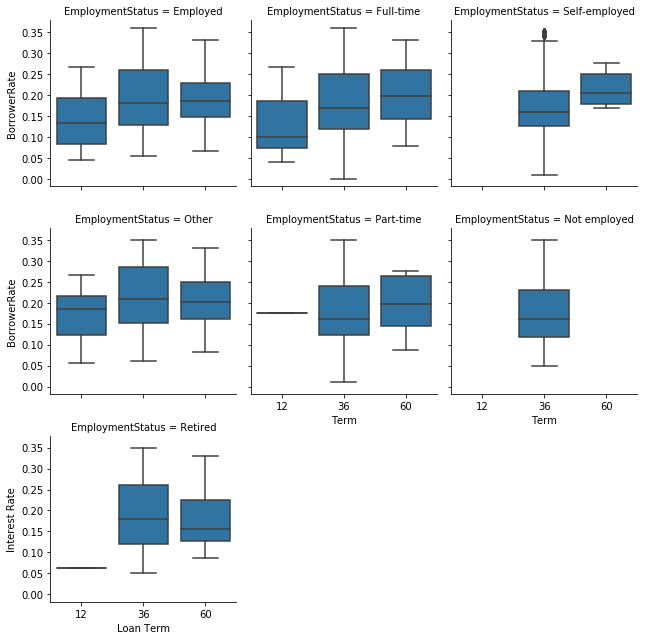

In [54]:
g = sb.FacetGrid(data = loanData, col = 'EmploymentStatus', height = 3, margin_titles = True, col_wrap = 3)
g.map(sb.boxplot, 'Term', 'BorrowerRate')
g.add_legend();
plt.xlabel('Loan Term');
plt.ylabel('Interest Rate');
# plt.title('Loan Term v/s Interest Rate with Employment Status');

#### MonthlyLoanPayment v/s CreditScore v/s IncomeRange v/s Loan Status

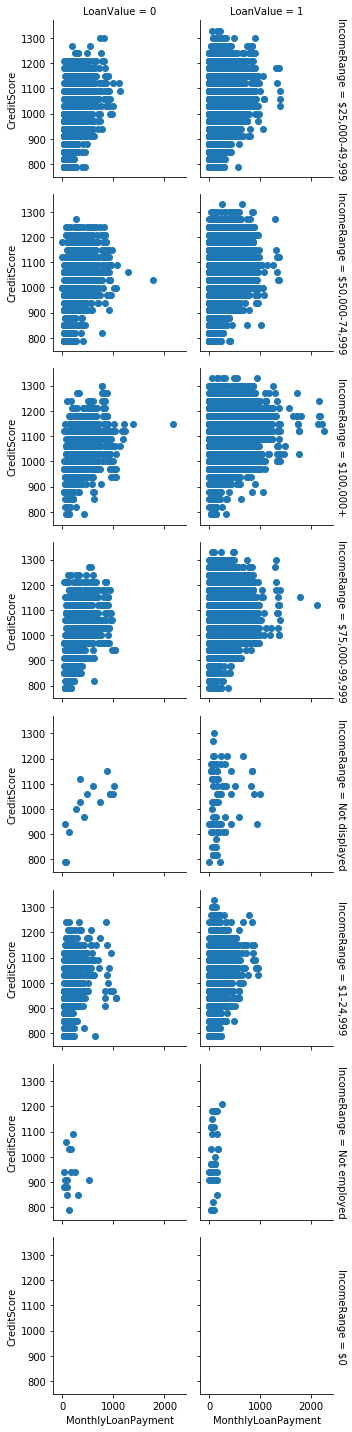

In [55]:
g = sb.FacetGrid(data = loanData, col = 'LoanValue', row = 'IncomeRange', height =2.5,
                margin_titles = True);
g.map(plt.scatter, 'MonthlyLoanPayment', 'CreditScore');

> Here we can see that Monthly loan payment and Credit score relation is highest got Non-Defautlters with Income range of 10,0000 + which is quite interesting relevation.
This going in decresing order of income range for non-defaulters.

#### CreditScore, Interest Rate, StatedMonthlyIncome

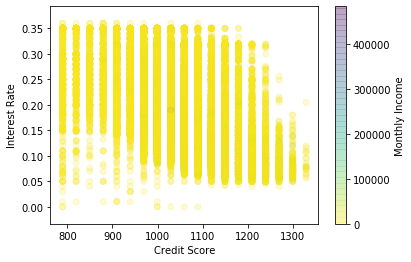

In [56]:
plt.scatter(data = loanData, x = 'CreditScore', y = 'BorrowerRate', c = 'StatedMonthlyIncome', cmap ='viridis_r', alpha = 1/5);
plt.colorbar(label = 'Monthly Income');
plt.xlabel('Credit Score');
plt.ylabel('Interest Rate');

> We can see that Credit is lower for higher interest rate which we have dicovered but we can see here that this pattern is prevalent among people with lower to average monthly income. 

#### Current Credit Lines v/s Credit Score v/s  Bankcard Utilization

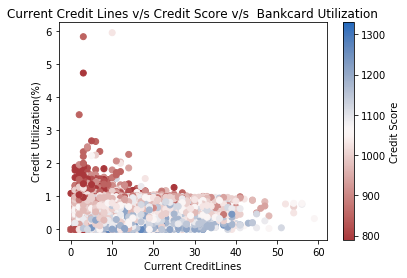

In [70]:
plt.scatter(data = loanData, x = 'CurrentCreditLines', y = 'BankcardUtilization', c = 'CreditScore', cmap ='vlag_r');
plt.colorbar(label = 'Credit Score');
plt.xlabel('Current CreditLines');
plt.ylabel('Credit Utilization(%)');
plt.title('Current Credit Lines v/s Credit Score v/s  Bankcard Utilization');

> Here as well we see a inverse relation between Credit utilization and credit Lines . We can again see that credit score is lower for higher credit utilization. So we can establish that there is direct relation between credit lines and credit score.

#### Open Revolving Monthly Payment v/s Monthly Loan Payment v/s Bankcard Utilization

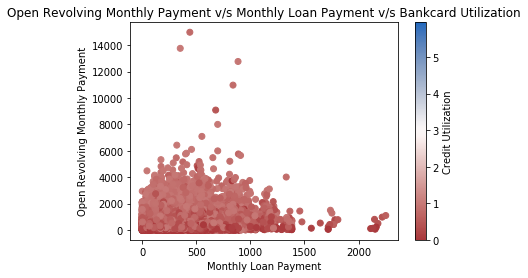

In [58]:
plt.scatter(data = loanData, x = 'MonthlyLoanPayment', y = 'OpenRevolvingMonthlyPayment', c = 'BankcardUtilization', cmap ='vlag_r');
plt.colorbar(label = 'Credit Utilization');
plt.xlabel('Monthly Loan Payment');
plt.ylabel('Open Revolving Monthly Payment');
plt.title('Open Revolving Monthly Payment v/s Monthly Loan Payment v/s Bankcard Utilization');

> This plot shows that larger revolving payment leads lower to lower monthly loan payment ie, lower loan amount and higher credit utilization which results in lower credit score which we discovered in previous plots. This another new insight we recievied.

#### MonthlyLoanPayment, CurrentDelinquencies, StatedMonthlyIncome 

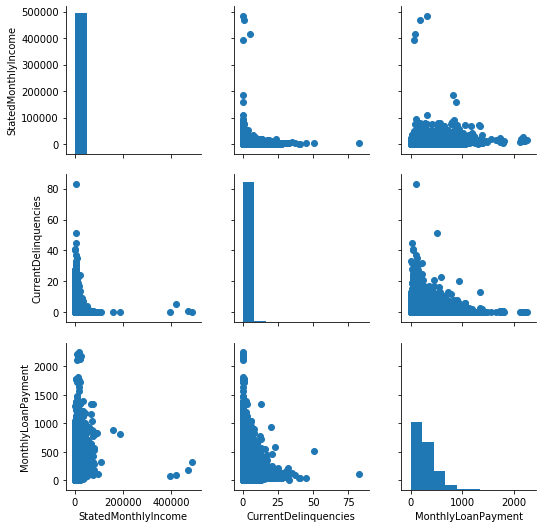

In [59]:
g = sb.PairGrid(data = loanData, vars = ['StatedMonthlyIncome', 'CurrentDelinquencies', 'MonthlyLoanPayment']);
g.map_diag(plt.hist);
g.map_offdiag(plt.scatter);

> From the above matrix plot , we see that all the relations are inverse which makes sense as having more current Delinquencies is not a good factor.

#### LoanOriginalAmount v/s Term v/s IncomeRange

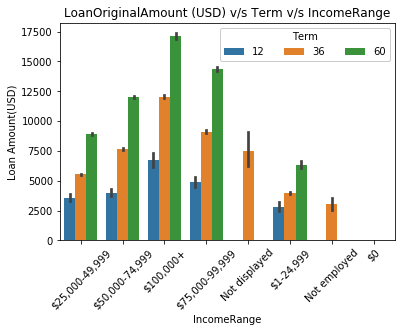

In [66]:
ax = sb.barplot(data = loanData, x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'Term');
ax.legend(loc = 1, ncol = 3, framealpha = 1, title = 'Term');
plt.xticks(rotation = 45);
plt.title('LoanOriginalAmount (USD) v/s Term v/s IncomeRange');
plt.ylabel('Loan Amount(USD)');

> Here we make another discovery, applicants under largest income bracket have taken the largest loan amount and longest loan term of 5 years. This new as we has seen previously that most people opted for 3 years term, here we get more insight that larger the loan amount, longer the term of loan.

#### Employment Status v/s LoanOriginYear v/s Available Credit

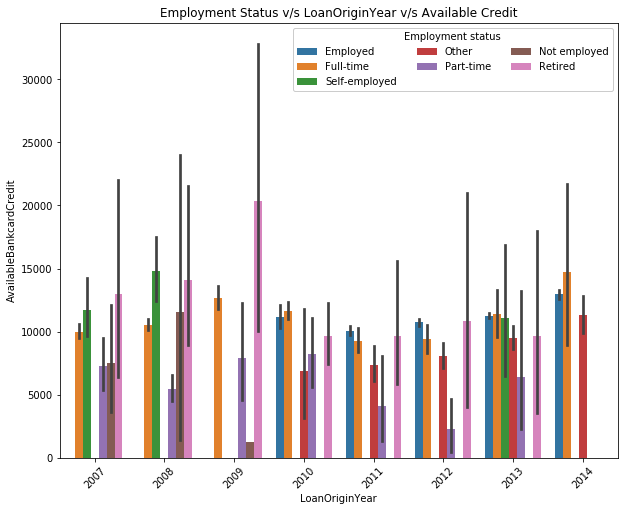

In [61]:
plt.figure(figsize =[10,8]);
ax = sb.barplot(data = loanData, x = 'LoanOriginYear', y = 'AvailableBankcardCredit', hue = 'EmploymentStatus');
ax.legend(loc = 1, ncol = 3, framealpha = 1, title = 'Employment status');
plt.xticks(rotation = 45);
plt.title('Employment Status v/s LoanOriginYear v/s Available Credit');

> Here we see that Available loan credit is surprisingly higher for retired employees which is prominent over the years, next we see consistency of available credit in Full-time employees. We can conclude that Available credit increses with time.

#### Debt-To-Income Ratio v/s Interest Rate v/s isHomeOwner

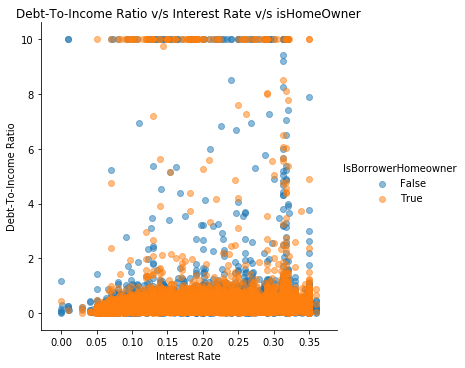

In [62]:
g = sb.FacetGrid(data = loanData, hue = 'IsBorrowerHomeowner', height = 5)
g.map(sb.regplot, 'BorrowerRate', 'DebtToIncomeRatio', fit_reg = False, scatter_kws = {'alpha' : 1/2});
g.add_legend();
# plt.legend(['Defaulters','Complete/Current'], loc = 1, title ='Home owner');
plt.xlabel('Interest Rate');
plt.ylabel('Debt-To-Income Ratio');
plt.title('Debt-To-Income Ratio v/s Interest Rate v/s isHomeOwner');

> Here we can see that although most of loan falls under lower Debt-to-income ratio, the interest seems to be incresing to incresing Debt-to-income ratio. However we can have an egde over non-home owners even if we have higher debt-to-income ratio.  

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> 
- It was previously discovered that Defaulters have higher interest compared to their counter parts but through the plot of Loan Amount v/s Interest Rate with Loan Status , I discovered further that they have higher interest rate even on lower loan amounts. 
- We already aware that larger revolving payment accounts leads to higher interest rates, we now discovered that it also leads to higher credit utilization which in turn leas to lower credit scores as well.
### Were there any interesting or surprising interactions between features?

> There were plenty of interesting discoveries made in multivariate exploration. The plot between Debt-To-Income Ratio v/s Interest Rate v/s isHomeOwner showed that inspite of havin a high income-to-debt ratio you can have an edge if youre a home owner! 
- Another surprising discovery was that although 3 year term is the average term, higher loan amount generally has a term of 5 years which was seen across all income ranges.